In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
from dotenv import load_dotenv

load_dotenv()

True

In [3]:
from datasets import DIV2KDataset, add_gaussian_noise

In [8]:
from torch.utils.data import DataLoader


dataset = DIV2KDataset(
    root=f"{os.getenv('DIV2K_DATA_PATH')}/DIV2K_train_HR",
    modification=lambda img: add_gaussian_noise(img, std=0.1),
)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [9]:
x, y = next(iter(dataloader))
print(x.shape)

torch.Size([16, 3, 256, 256])


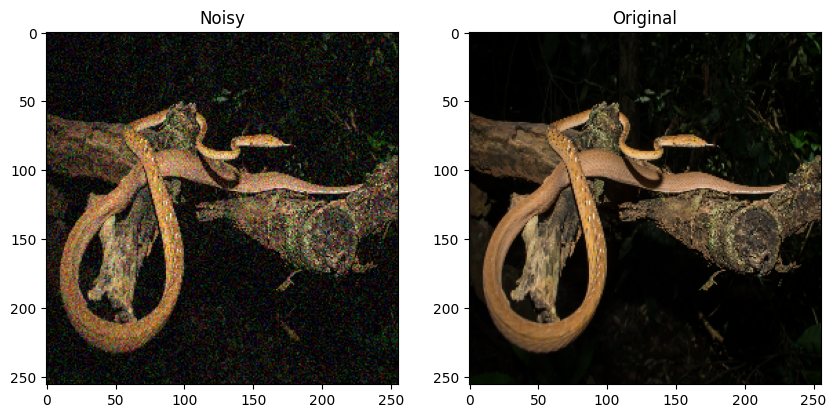

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(x[0].permute(1, 2, 0))
axs[0].set_title("Noisy")
axs[1].imshow(y[0].permute(1, 2, 0))
axs[1].set_title("Original")
plt.show()